# 7. SageMath for Mathematicians

## Table of Contents


- Introduction to SageMath
- Plotting and Widgets
- Algebra
- Graph Theory


## 7.1 Introduction to SageMath

SageMath (previously Sage or SAGE, "System for Algebra and Geometry Experimentation") is an open-source computer algebra system with features covering many aspects of mathematics, including algebra, combinatorics, graph theory, numerical analysis, number theory, calculus and statistics. It builds on top of many existing open-source packages: `numpy`, `scipy`, `matplotlib`, `sympy`, Maxima, GAP, FLINT, R and many more. Reference manuals can be found here: https://doc.sagemath.org/pdf/en/reference/.

The first version of SageMath was released on 24 February 2005, with the initial goals of creating an "open source alternative to Magma, Maple, Mathematica, and MATLAB". The originator and leader of the SageMath project, William Stein (https://wstein.org/), was a mathematician at the University of Washington. William has written books/syllabi in which he uses SageMath, e.g., _Modular Forms, A Computational Approach_ or _Algebraic Number Theory, A Computational Approach_.

<p align="center">
<img src="https://www.freetechbooks.com/uploads/1463432768-SteinLG.jpg" width="25%">
</p>

We can install SageMath via https://www.sagemath.org/. You can watch the following tutorial:

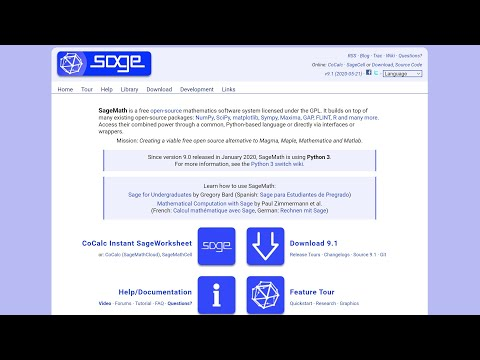

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('A4j3qbCn1PM', width=533, height=300)

`SageMath` claims to be faster than packages like `Magma` and `Matlab`. Let's do a quick test:

In [3]:
%%timeit
import math
math.factorial(100000)

1 loop, best of 5: 185 ms per loop


In [4]:
%%timeit
factorial(100000)

10 loops, best of 5: 27.8 ms per loop


At least the algorithms are faster than the standard Python packages!

## 7.2 Plotting and Widgets

Recall that `sympy` provides an easy way to express and plot mathematical functions. As `SageMath` extends `sympy`, we can do similar things:

In [5]:
%display latex

In [6]:
f = sin(x)^2 + cos(x)^2
f

cos(x)^2 + sin(x)^2

In [8]:
f.simplify_trig()

1

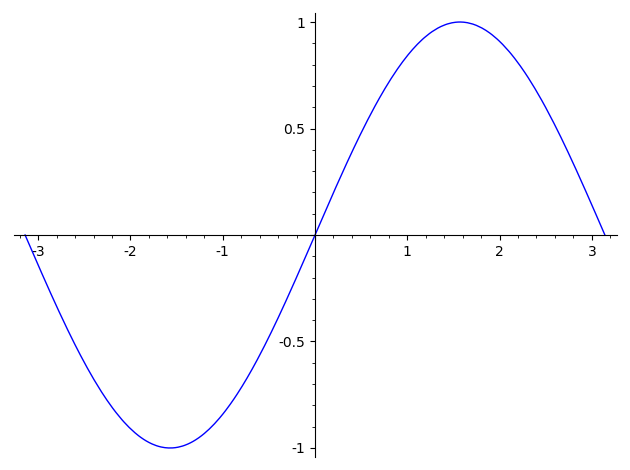

In [9]:
plot(sin(x), (x,-pi,pi))

We can plot multiple functions by simply using the `+` sign:

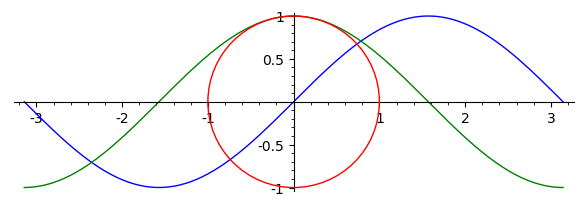

In [10]:
plot(sin(x), (-pi,pi)) + plot(cos(x), (-pi,pi), rgbcolor=Color('green')) + circle((0,0), 1, rgbcolor=Color('red'))

Plots can be made interactive by using the `@interact` decorator from the `ipywidgets` package:

In [11]:
# var('x')
pretty_print(html('<h3>Numerical integrals with the midpoint rule</h3>'))

@interact
def midpoint(n=slider(1,50,1), f=input_box(default="x^2", type=str), color=Color('blue'),
             start=input_box(default="0", type=str), end=input_box(default="1", type=str)):
    
    a = round(N(start),3)
    b = round(N(end),3)
    
    func = sage_eval(f, locals={'x':x})
    dx = (b-a)/n
    
    midxs = [q*dx+dx/2 + a for q in range(n)]
    midys = [func(x=x_val) for x_val in midxs]
    
    rects = Graphics()
    for q in range(n):
        xm = midxs[q]
        ym = midys[q]
        rects += line([[xm-dx/2,0], [xm-dx/2,ym], [xm+dx/2,ym], [xm+dx/2,0]], rgbcolor=(1,0,0)) \
                    + point((xm,ym), rgbcolor = (1,0,0))
    
    show(plot(func,a,b,rgbcolor=color) + rects, xmin = a, xmax = b)
    
    print("\nSage numerical answer: " + str(integral_numerical(func,a,b,max_points = 200)[0]))
    print("Midpoint estimated answer: " + str(RDF(dx*sum([midys[q] for q in range(n)]))))


<h3>Numerical integrals with the midpoint rule</h3>

Interactive function <function midpoint at 0x6fe508038c8> with 5 widgets
  n: TransformIntSlider(value=1, desc…

It is also possible to build a complete function toolbox:

In [12]:
pretty_print(html('<h3>Function Toolbox</h3>'))

@interact
def _(f=sin(x), g=cos(x), xrange=input_box((0,1)), yrange='auto',
      action=selector(['df/dx', 'int f', '1/f', 'finv', 'f+g', 'f-g', 'f*g', 'f/g', 'f(g)'],
      width=15, nrows=5, label="h = "), do_plot = ("Draw Plots", False)):
    
    f, g = SR(f), SR(g)
    h, lbl = 0, ''
    
    if action == 'df/dx':
        h, lbl = f.derivative(x), '\\frac{df}{dx}'
    elif action == 'int f':
        h, lbl = f.integrate(x), '\\int f dx'
    elif action == '1/f':
        h, lbl = 1 / f, '\\frac{1}{f}'
    elif action == 'finv':
        h, lbl = solve(f == var('y'), x)[0].rhs(), 'f^{-1}(y)'
    elif action == 'f+g':
        h, lbl = f + g, 'f + g'
    elif action == 'f-g':
        h, lbl = f - g, 'f - g'
    elif action == 'f*g':
        h, lbl = f * g, 'f \\times g'
    elif action == 'f/g':
        h, lbl = f / g, '\\frac{f}{g}'
    elif action == 'f(g)':
        h, lbl = f(g), 'f(g)'
    
    pretty_print(html('<center><font color="red">$f = %s$</font></center>'%latex(f)))
    pretty_print(html('<center><font color="green">$g = %s$</font></center>'%latex(g)))
    pretty_print(html('<center><font color="blue"><b>$h = %s = %s$</b></font></center>'%(lbl, latex(h))))
    
    if do_plot:
        P = plot(f, xrange, color='red', thickness=2) + plot(g, xrange, color='green', thickness=2) + \
            plot(h, xrange, color='blue', thickness=2)
        if yrange == 'auto':
            show(P, xmin=xrange[0], xmax=xrange[1])
        else:
            yrange = sage_eval(yrange)
            show(P, xmin=xrange[0], xmax=xrange[1], ymin=yrange[0], ymax=yrange[1])

<h3>Function Toolbox</h3>

Interactive function <function _ at 0x6fe4df0fa60> with 6 widgets
  f: EvalText(value='sin(x)', description='f…

Note that `SageMath` can also be useful for building interactive widgets, which can be used in e.g. _Basiswiskunde_:

In [14]:
# %load resources/venn_diagram.py
def f(s, braces=True):
    t = ', '.join(sorted(list(s)))
    if braces: return '{' + t + '}'
    return t

def g(s):
    return set(str(s).replace(',',' ').split())

pretty_print(html('<h3>Venn Diagram</h3>'))
pretty_print(html('Pick your sets X (yellow), Y (blue) and Z (green):'))

@interact
def _(X='1,2,3,Chris', Y='2,Chris,3,4,apple', Z='Chris,b,10,apple'):
    S = [g(X), g(Y), g(Z)]
    X,Y,Z = S
    XY = X & Y
    XZ = X & Z
    YZ = Y & Z
    XYZ = XY & Z

    pretty_print(html('We have the following intersections:'))
    pretty_print(html("<center><p>$X \\cap Y$ = {}</p><p> $X \\cap Z$ = {}</p><p> $Y \\cap Z$ = {}</p><p> $X \\cap Y \\cap Z$ = {}<center>".format(f(XY),f(XZ),f(YZ),f(XYZ))))
    centers = [(cos(n*2*pi/3), sin(n*2*pi/3)) for n in [0,1,2]]
    scale = 1.7
    clr = ['yellow', 'blue', 'green']
    G = Graphics()
    for i in range(len(S)):
        G += circle(centers[i], scale, rgbcolor=clr[i],
             fill=True, alpha=0.3)
    for i in range(len(S)):
        G += circle(centers[i], scale, rgbcolor='black')

    # plot what is in one but neither other
    for i in range(len(S)):
        Z = set(S[i])
        for j in range(1,len(S)):
            Z = Z.difference(S[(i+j)%3])
        G += text(f(Z,braces=False), (1.5*centers[i][0],1.7*centers[i][1]), rgbcolor='black')

    # plot pairs of intersections
    for i in range(len(S)):
        Z = (set(S[i]) & S[(i+1)%3]) - set(XYZ)
        C = (1.3*cos(i*2*pi/3 + pi/3), 1.3*sin(i*2*pi/3 + pi/3))
        G += text(f(Z,braces=False), C, rgbcolor='black')

    # plot intersection of all three
    G += text(f(XYZ,braces=False), (0,0), rgbcolor='black')

    G.show(aspect_ratio=1, axes=False)


<h3>Venn Diagram</h3>

Pick your sets X (yellow), Y (blue) and Z (green):

Interactive function <function _ at 0x6fe4efbf6a8> with 3 widgets
  X: Text(value='1,2,3,Chris', description='…

## 7.3 Algebra

First, let's play with prime numbers:

In [15]:
%display plain

In [18]:
p = Primes()
p # len(p)

Set of all prime numbers: 2, 3, 5, 7, ...

In [27]:
p[99]

541

Conversely, we can get the prime factorization of any natural number by using the function `factor()`:

In [29]:
factor(542)

2 * 271

Using this, it is quite straightforward to build a prime factorization widget:

In [30]:
@interact
def _(r=selector([1000 * i for i in range(10)], label='range', buttons=True), n=slider(0,1000,1,2,'n',True)):
    
    # don't show prime factorization for 0 or 1
    if not r and n in (0, 1):
        n = 2
    
    s = f'${r+n} = {factor(r + n)}$'
    pretty_print(html(s.replace('*', '\\times')))

Interactive function <function _ at 0x6fe4e629048> with 2 widgets
  r: ToggleButtons(description='range', opti…

We can easily call our famous fields $\mathbb{Z}, \mathbb{Q}, \mathbb{R}, \mathbb{C}$ using `SageMath`:

In [33]:
ZZ # Integers()

Integer Ring

In [34]:
QQ # Rationals()

Rational Field

In [36]:
RR # Reals(53)

Real Field with 100 bits of precision

In [37]:
CC # Complexes(53)

Complex Field with 53 bits of precision

We can also define a group and compute inverses:

In [40]:
R = Integers(100) # group of integers mod 100
R(7^(-1)) # R(7^(-1))

43

Hence, $7^{-1} = 43\mod 100$. We can check that this is true by multiplying both sides by $7$:

In [41]:
Mod(43*7,100)

1

Now consider the permutation group $S_3$ (https://groupprops.subwiki.org/wiki/Symmetric_group:S3):

In [42]:
G = SymmetricGroup(3)
G

Symmetric group of order 3! as a permutation group

The elements can be found by using the `list` attribute:

In [43]:
G.list()

[(), (1,3,2), (1,2,3), (2,3), (1,3), (1,2)]

We can print our multiplication table as follows:

In [44]:
multTable = [['X']]

for g in G: 
    multTable[0].append(g)

for i, g1 in enumerate(G):
    multTable.append([g1])
    for j, g2 in enumerate(G):
        multTable[-1].append(g1 * g2)

table(multTable, header_column=True, header_row=True)

X,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,


Let's print a table of the commutators:

In [45]:
def commutator(g1, g2):
    return g1 * g2 * g1.inverse() * g2.inverse()

In [46]:
multTable = [['*']]

for g in G: 
    multTable[0].append(g)

for i, g1 in enumerate(G):
    multTable.append([g1])
    for j, g2 in enumerate(G):
        multTable[-1].append(commutator(g1, g2))

table(multTable, header_column=True, header_row=True)

*,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,
,,,,,,


Now consider the group of $(2\times 2)$-matrices on $\mathbb{Z}$, also known as $SL_2(\mathbb{Z})$ (https://en.wikipedia.org/wiki/Special_linear_group):

In [205]:
G = SL(2,ZZ)

In [206]:
A = G([0,-1,1,0])
A

[ 0 -1]
[ 1  0]

In [207]:
B = G([1,1,0,1])
B

[1 1]
[0 1]

It is very natural to multiply matrices or to compute inverses:

In [208]:
A * B * A^(-1)

[ 1  0]
[-1  1]

Now let's define a finite field of size 49:

In [209]:
K.<y> = GF(49)
K

Finite Field in y of size 7^2

In [201]:
# K.list() # elements of K

It is easy to compute the generators:

In [210]:
K.gens() # generator of K

(y,)

In [211]:
y^2

y + 4

The group $\mathbb{Q}(\sqrt{5})$ has multiple generators (https://www.lmfdb.org/NumberField/2.2.5.1):

In [5]:
L.<a> = NumberField(x^2+15)
L

Number Field in a with defining polynomial x^2 + 15

In [6]:
a^2

-15

In [7]:
O = L.ring_of_integers()
O.gens()

(1/2*a + 1/2, a)

In [8]:
L.class_group()

Class group of order 2 with structure C2 of Number Field in a with defining polynomial x^2 + 15

We can factorize any polynomial in a ring by using the `factor` attribute:

In [9]:
P.<x> = PolynomialRing(Rationals())

f = x^2 - 1
f.factor()

(x - 1) * (x + 1)

If we change our ring, we get the following factorization:

In [12]:
P.<x> = PolynomialRing(GF(13))

g = x^2 - 1
g.factor()

(x + 1) * (x + 12)

We can also use the `roots` attribute:

In [13]:
g.roots()

[(12, 1), (1, 1)]

Finally, we can also draw elliptic curves using the command `EllipticCurve`:

In [16]:
E = EllipticCurve([1,2,3,4,5])
E

Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field

In [22]:
P = E.gens()[0]
P

(1 : 2 : 1)

In [23]:
2 * P

(-103/64 : -233/512 : 1)

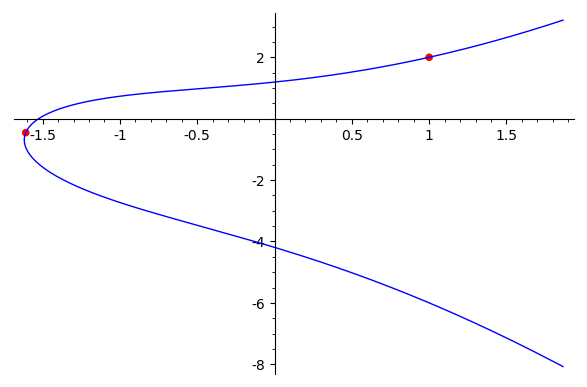

In [32]:
plot(E) + plot(P,rgbcolor=Color('red'),size=30) + plot(2*P,rgbcolor=Color('red'),size=30)

We can also find an elliptic curve by using its _Cremona label_:

In [33]:
E = EllipticCurve('5077a1')
E

Elliptic Curve defined by y^2 + y = x^3 - 7*x + 6 over Rational Field

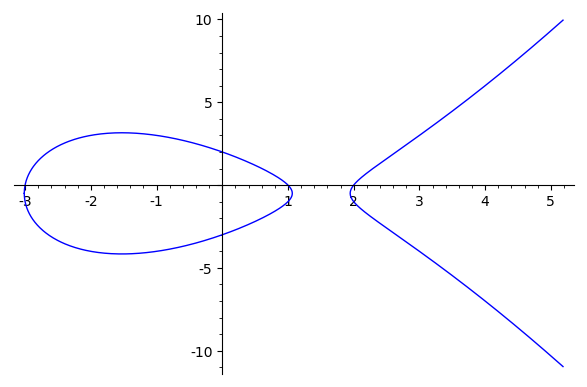

In [103]:
plot(E)

This is the famous elliptic curve _5077a1_ (https://www.lmfdb.org/EllipticCurve/Q/5077/a/1).

Algebraici also like to play with the _Rubik's cube_:

In [36]:
r = RubiksCube()
r.show3d() # r.show()

Graphics3d Object

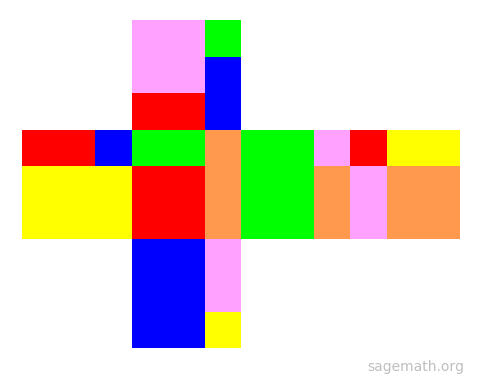

In [37]:
r = r.move("R U R")
r.show() # r.show3d()

In [38]:
r.solve()

'R U R'

_Tip from Miranda Cheng:_ Adventures in Group Theory: Rubik's Cube, Merlin's Machine, and Other Mathematical Toys (David Joyner).

## 7.4 Graph Theory

Finally, we show how to create graphs using `SageMath` and do some small computations with them. Consider the following graph:

In [40]:
from IPython.display import Image

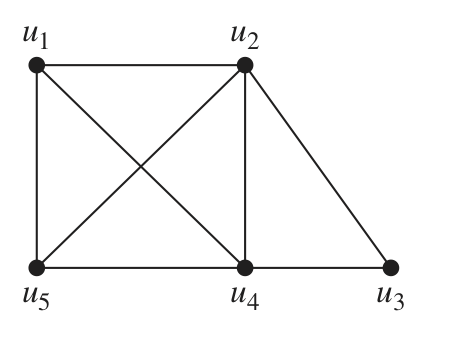

In [41]:
Image(filename='resources/G1.png')

To create a Graph Object, we need to use the `Graph()` constructor. First, let's create an empty Graph object with no vertices (nodes) and edges (lines):

In [42]:
# G1 = Graph()
# G1.show()

In the constructor, we can pass in our graph as a dictionary, which is essentially the same as how we inserted our data in the graph objects of the data visualization package `plotly`. In our dictionary, a _key_ is a vertex, and a _value_ is a list of all nodes it is connected to:

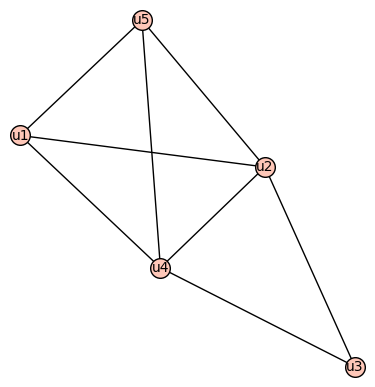

In [43]:
G1 = Graph({'u1':['u2', 'u5', 'u4'], 'u2':['u1','u5','u4','u3'], 'u3':['u2', 'u4'], 'u4':['u2','u1', 'u5']})
G1.show()

We can do several things with our graph. For instance, we can compute its average degree:

In [44]:
G1.average_degree()

16/5

Now consider the following graph:

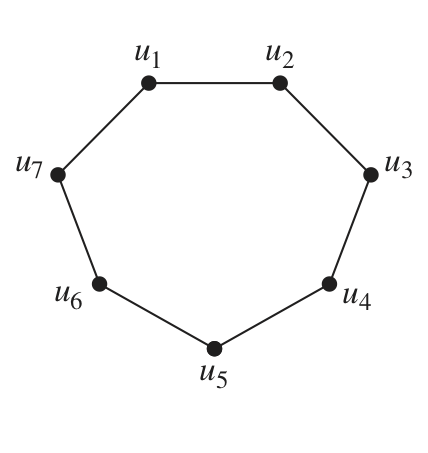

In [45]:
Image(filename='resources/G2.png')

As in `plotly`, there are different ways to create our graph. It is also possible to pass in a list with all edges. Let's create a weighted graph:

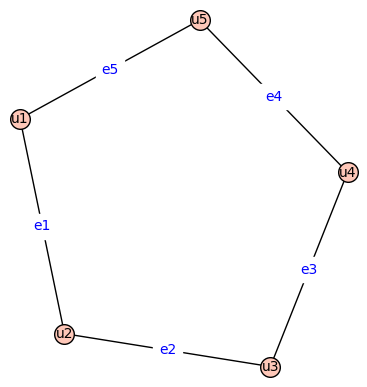

In [46]:
G2 = Graph()
G2.add_edges([('u1', 'u2', "e1"), ('u2', 'u3', "e2"), ('u3', 'u4', "e3"), ('u4','u5', "e4"), ('u5', 'u1', "e5")]) 
G2.show(vertex_labels=True, edge_labels=True)

In [47]:
G2.num_edges()

5

In [48]:
G2.average_degree()

2

Our third graph is a directed graph:

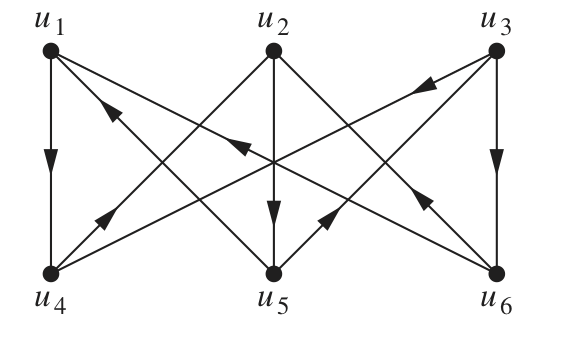

In [49]:
Image(filename='resources/D1.png')

In [51]:
D1 = DiGraph()

We can also produce the graph edge by edge:

In [52]:
# u_1 edges 
D1.add_edge('u1', 'u4')
# u_2 edges 
D1.add_edge('u2', 'u5')
# u_3 edges 
D1.add_edge('u3', 'u6')
D1.add_edge('u3', 'u4')
# u_4 edges 
D1.add_edge('u4', 'u2')
# u_5 edges
D1.add_edge('u5', 'u1')
D1.add_edge('u5', 'u3')
# u_6 edges
D1.add_edge('u6', 'u1')
D1.add_edge('u6', 'u2')

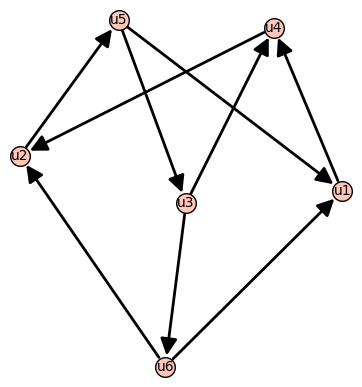

In [53]:
D1.show()
# D1.show3d()

We'd like to check whether our graph $D_1$ is isomorphic to the following graph:

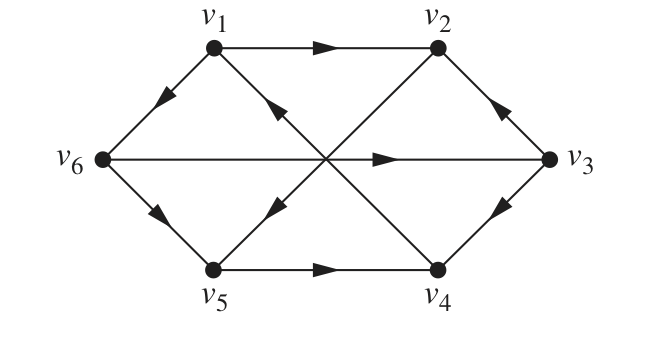

In [28]:
Image(filename="resources/D2.png")

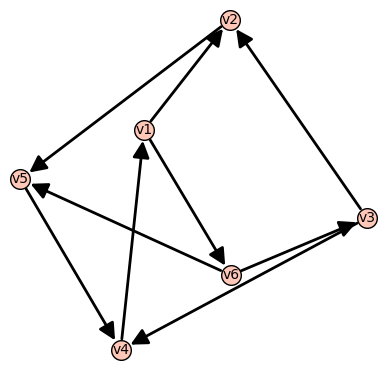

In [184]:
D2 = DiGraph()
D2.add_edges([('v1','v6'),('v1', 'v2'),('v2', 'v5'),('v3', 'v2'),('v3', 'v4'),
              ('v4', 'v1'),('v5', 'v4'),('v6', 'v5'),('v6', 'v3')])
D2.show()
# D2.show3d()

In [185]:
D1.is_isomorphic(D2)

True

We can find several other graphs by using the following graph tool:

In [ ]:
%load resources/graph_tool.py

Now let's solve a problem **similar** to _the Seven Bridges of Köningsberg_ problem:

> _Question:_
Can someone cross all the bridges shown in this map exactly once and return to the starting point? 

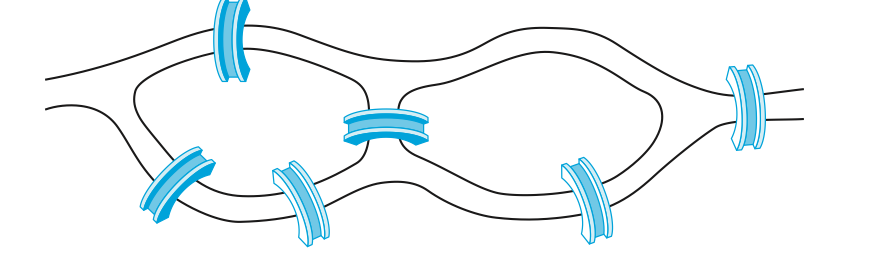

In [55]:
Image(filename='resources/ex.png')
# Image(filename='resources/ex_hint.png')

This famous historical problem is solved by Leonhard Euler in 1735, but please note that our example is different from the Köningsberger problem:

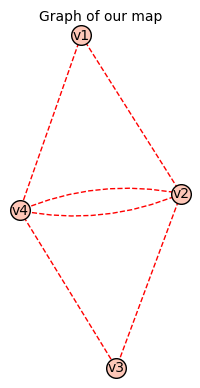

In [56]:
map_graph = Graph(multiedges=True)

map_graph.add_edge("v1", "v2")
map_graph.add_edge("v1", "v4")
map_graph.add_edge("v2", "v3")
map_graph.add_edge("v2", "v4")
map_graph.add_edge("v2", "v4")
map_graph.add_edge("v3", "v4")

map_graph.graphplot(title="Graph of our map", edge_style="dashed", edge_labels=False, edge_color="red").plot()

We need to check whether the graph is Eulerian:

In [57]:
map_graph.is_eulerian()

True

Let's find an Eulerian path:

In [58]:
map_graph.eulerian_circuit()

[('v1', 'v4', None),
 ('v4', 'v3', None),
 ('v3', 'v2', None),
 ('v2', 'v4', None),
 ('v4', 'v2', None),
 ('v2', 'v1', None)]

As opposed to the original Köningsberger problem, this example is solvable by an Eulerian path, whereas the original example by Euler wasn't.

### 🔴 *This was the final lecture.*